Object Detection using Transfer Learning

In [ ]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import tensorflow as tf
import scipy
from tensorflow.keras import models, optimizers, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

2023-11-16 01:07:16.253372: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 01:07:16.588000: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 01:07:16.588071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 01:07:16.653159: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 01:07:16.811318: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 01:07:16.814709: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [ ]:
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
# x_train = x_train/255
# x_test = x_test/255

In [ ]:
data_dir = "/home/gargi/DLL/LP-IV-datasets/Object Detection(Ass6)/caltech-101-img"
img_gen = ImageDataGenerator(
    rescale = 1.0/255
)
batch_size = 2000
dataset_generator = img_gen.flow_from_directory(
    data_dir,
    batch_size = batch_size,
    target_size = (64,64),
    class_mode = "categorical"
)

Found 9144 images belonging to 102 classes.


In [ ]:
dataset_generator

In [ ]:
x_train, y_train = dataset_generator[0]
x_train.shape

(2000, 64, 64, 3)

In [ ]:
x_test, y_test = dataset_generator[1]
x_test.shape

(2000, 64, 64, 3)

In [ ]:
y_train.shape

(2000, 102)

In [ ]:
weight_path = "LP-IV-datasets/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

base_model = VGG16(weights = weight_path, input_shape=(64,64,3), include_top = False)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(102, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 102)               26214     
                                                                 
Total params: 15265446 (58.23 MB)
Trainable params: 15265446 (58.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train,batch_size = 200, epochs = 1, validation_data=(x_test, y_test))

10/10 [==============================] - 1045s 106s/step - loss: 4.2189 - accuracy: 0.0925 - val_loss: 4.2140 - val_accuracy: 0.1050


In [ ]:
for layer in base_model.layers[-4:]:
    layer.trainable=True

In [ ]:
model2 = models.Sequential()
model2.add(base_model)
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation="relu"))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(102, activation='softmax'))

model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
!pip install matplotlib
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 556.4 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 KB 926.8 kB/s eta 0:00:001.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.4 MB/s eta 0:00:001.4 MB/s eta 0:00:010m
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
prediction = model.predict(x_test)

63/63 [==============================] - 75s 1s/step


In [ ]:
labels = list(dataset_generator.class_indices.keys())

Predicted: Motorbikes
Actual: airplanes


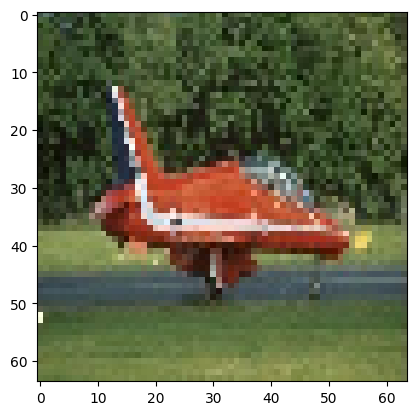

In [ ]:
n = 999
plt.imshow(x_test[n])
print("Predicted:", labels[np.argmax(prediction[n])])
print("Actual:", labels[np.argmax(y_test[n])])

In [ ]:
#test_loss, test_accuracy = model.estimate(x_test, y_test)
#print("Test Accuracy:", test_accuracy)


predict_x=model.predict(x_test)
classes_x=np.argmax(predict_x,axis=1)
classes_x

63/63 [==============================] - 115s 2s/step


array([4, 6, 6, ..., 6, 6, 6])

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

63/63 [==============================] - 152s 2s/step - loss: 4.2140 - accuracy: 0.1050
Test Accuracy: 0.10499999672174454
